# Investigating Factors of Rising House Values in New York City

Team Members: Francisco Brady (fbrady), Zhonghan Xie (jonasxie), Michael Garner (mngarner)
Date: 2024-10-15

## Introduction
### Overview of the Project
The inflation of the last few years has affected all areas of the economy, and for graduate students who are looking to move on to the next stage of their lives, the cost of living is a major concern. One of the largest components of the cost of living is housing. For this project, we will be analyzing the housing market in New York City and its social impacts, in particular the relationships between house prices, eviction rates, and education, and whether these factors may predict each other to some extent.

### Motivations

As house prices continue to rise in New York City, the ripple effects on communities are profound. For example, the median home price in NYC reached approximately \$754,000 as of September 2024, 29.5\% increase from that of September 2017. While rapidly increasing property values may signal economic growth, they also contribute to housing instability and displacement, particularly among lower-income residents. At the same time, access to quality educational resources remains a crucial factor for many families in deciding where to live. In areas where public schools are highly rated and well-attended, home prices often exceed city averages, reflecting the economic value of educational resources placed on educational quality. This project aims to investigate the factors that contribute to rising house prices in NYC, their impact on eviction rates and the intersection between educational outcomes and housing markets. By understanding these relationships, we hope to inform policymakers and community stakeholders on how to address the challenges of access to quality education, housing affordability and stability in the city.

Three questions that we seek to answer in an analysis of housing price, eviction rate, and educational datasets for NYC are:
1. What impact does rising housing prices have on eviction rates in NYC? Are these strongly correlated?
2. As a second-order effect, does the change in eviction rate due to housing prices predict a change in primary/secondary education attendance?
3. How do the relationships between housing prices, eviction rates, and education vary across different neighborhoods in NYC? Do the predictive relationships differ in boroughs with different socioeconomic characteristics?

Refereces:
- [Zillow Research: New York City House Value](https://www.zillow.com/home-values/6181/new-york-ny/?msockid=050262ffa66f68bc07d876dda76b6905)

## Data Sources

House price data: We use the house value index as the proxy of the average house price in each neighborhood in New York City. We pulled the data from [Zillow Research](https://www.zillow.com/research/data/?msockid=38d5e17d86ff660f269ef545876967bd), the research department of a real-estate marketplace company. The data is available at the neighborhood level and is updated monthly.

Borough-level Pre-K - Grade 12 attendance data: We use the attendance and chronic absenteeism rates as indicators of the positive or negative effects of housing prices on educational outcomes. The data was pulled from the [NYC Department of Education](https://infohub.nyced.org/reports/students-and-schools/school-quality/information-and-data-overview/end-of-year-attendance-and-chronic-absenteeism-data). This data complements the housing price data by providing insights into how educational outcomes differ between neighborhoods with varying housing prices, a proxy for the socioeconomic status of the residents. It complements eviction data in that evictions could drive a decline in attendance rates, with evicitions themselves potentially being driven by rising housing prices across time.

## Data Description

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### House Value Index Data
- Read in the neighborhood-level house value index data from Zillow Research.
- Reshape the data from wide form to long form.
- Aggregate the data to the county-year level.
- Do some exploratory data analysis and visualization

In [3]:
# Import data
neighbor_HVI = pd.read_csv('./data/zillow_HVI_neighborhood.csv.gz', compression='gzip')

In [4]:
# Filter the data to New York City
nyc_neighbor_HVI = neighbor_HVI[neighbor_HVI['City'] == 'New York']

In [5]:
# Keeping only the columns that are relevant
nyc_neighbor_HVI.drop(columns = ['City', 'State', 'Metro', 'StateName', 'SizeRank', 'RegionType'], inplace = True)

C:\Users\Michael Garner\AppData\Local\Temp\ipykernel_18396\203724963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_neighbor_HVI.drop(columns = ['City', 'State', 'Metro', 'StateName', 'SizeRank', 'RegionType'], inplace = True)


In [6]:
nyc_neighbor_HVI.sample(5)

,RegionID,RegionName,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
477,275247,Rosedale,Queens County,245574.508202,246760.470323,247928.768439,249740.944682,251304.256756,252853.844640,254628.430873,...,674459.966922,674737.340304,676998.684286,680898.848197,685869.508402,688642.005351,688458.270709,687081.486364,687814.913131,691813.409626
381,270891,Morningside Heights,New York County,153725.006060,156943.758816,158291.189151,163133.267053,168376.410720,173924.525815,177628.206687,...,740943.767399,743005.062414,744139.697620,744111.316463,745090.737496,747029.009828,749557.368580,751844.378392,756248.996624,757463.696535
162,5837,Maspeth,Queens County,222764.542706,223642.085646,225005.030071,227180.289025,229224.377773,231034.130080,233432.370636,...,812740.709088,813521.748089,813996.714454,816621.119181,820888.475426,824456.035470,824513.812448,825351.781880,827789.620085,832329.122930
602,26352,Ozone Park,Queens County,221425.539721,222194.803434,223371.017609,225039.653834,226848.934845,228774.017950,231310.307920,...,681367.787939,683148.320010,685957.157130,689250.040351,694623.356121,697966.126662,698815.476566,698613.679127,701322.959718,706065.579642
1289,275754,Tottenville,Richmond County,230878.378487,232205.405330,232835.470585,234725.937992,236711.772972,240162.047570,244364.921680,...,735679.030192,737236.109403,741307.530755,746764.293272,751697.441936,755871.211400,757559.347046,759047.410893,760406.639189,762780.250846


In [7]:
# Reshape the data from wide to long
nyc_neighbor_HVI_long = pd.melt(nyc_neighbor_HVI, id_vars = ['RegionID','RegionName','CountyName'], var_name = 'Date', value_name = 'HVI')

In [8]:
# Convert the Date column to datetime and extract the year
nyc_neighbor_HVI_long['Date'] = pd.to_datetime(nyc_neighbor_HVI_long['Date'])
nyc_neighbor_HVI_long['Year'] = nyc_neighbor_HVI_long['Date'].dt.year

In [9]:
# inspect the dataframe
nyc_neighbor_HVI_long.sample(5)

,RegionID,RegionName,CountyName,Date,HVI,Year
36837,270828,East Harlem,New York County,2015-06-30,661308.097794,2015
51703,403125,Meiers Corners,Richmond County,2021-08-31,635843.672375,2021
53505,193555,Bulls Head,Richmond County,2022-05-31,636658.596944,2022
1993,272902,Bedford-Stuyvesant,Kings County,2000-11-30,150755.277398,2000
17029,343212,Morris Park,Bronx County,2007-02-28,660741.441247,2007


In [10]:
# Save the Neighborhood HVI data
nyc_neighbor_HVI_long.to_csv('./data/nyc_neighbor_HVI.csv.gz', index = False, compression='gzip')

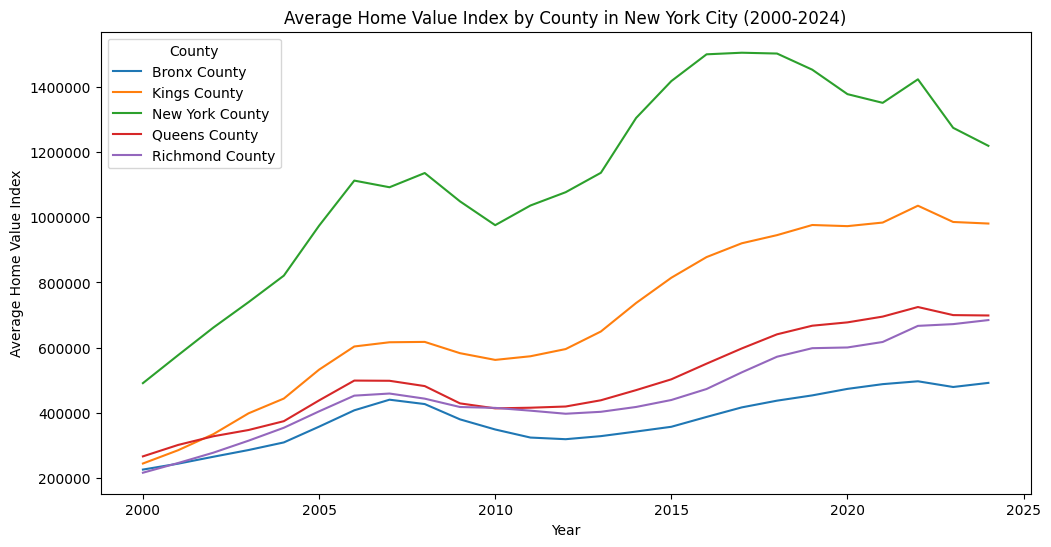

In [11]:
# Calculate the average HVI for each County by year
nyc_county_HVI_avg = nyc_neighbor_HVI_long.groupby(['CountyName','Year']).agg({'HVI':'mean'}).reset_index()

# Plot the average HVI for each County by year
plt.figure(figsize=(12,6))
sns.lineplot(data = nyc_county_HVI_avg, x = 'Year', y = 'HVI', hue = 'CountyName')
plt.title('Average Home Value Index by County in New York City (2000-2024)')
plt.xlabel('Year')
plt.ylabel('Average Home Value Index')
plt.ticklabel_format(style='plain', axis='y') 
plt.legend(title = 'County')
#plt.grid(True)
plt.show()

The house value of all counties in New York City increased significantly over the 24 years. The house value index of New York County increased the most, followed by Kings County and Queens County. The average house value decreased after 2008, suggesting the impact of the financial crisis. But the average house value has been increasing since 2012.

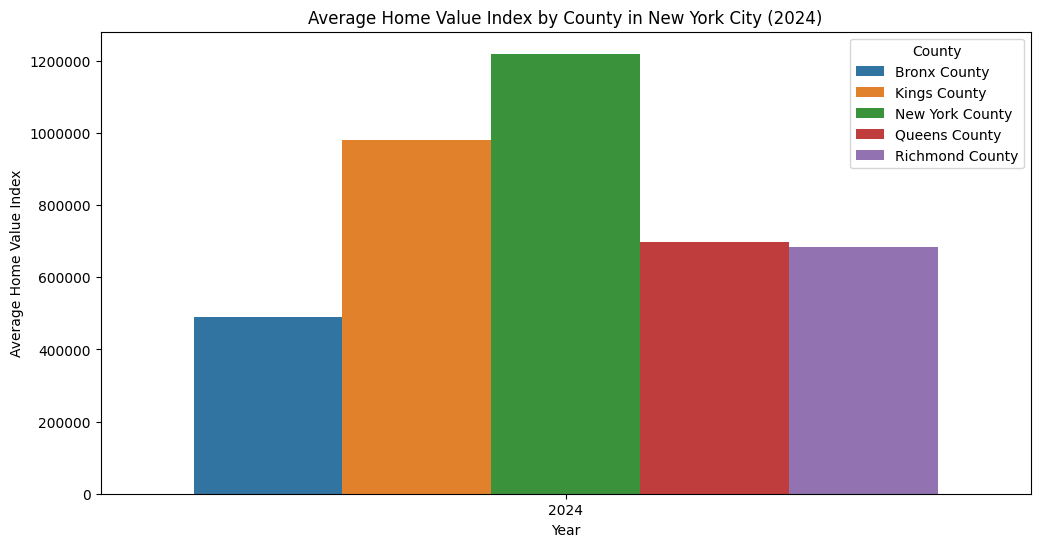

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data = nyc_county_HVI_avg[nyc_county_HVI_avg['Year']==2024], x = 'Year', y = 'HVI', hue = 'CountyName')
plt.title('Average Home Value Index by County in New York City (2024)')
plt.xlabel('Year')
plt.ylabel('Average Home Value Index')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title = 'County')
plt.show()

The above bar plot showed the average house value index of each county in New York City. The house value index of New York County is the highest (about \$1,200,000), followed by Kings County and Queens County. Bronx county has the lowest average house value index (about \$500,000).

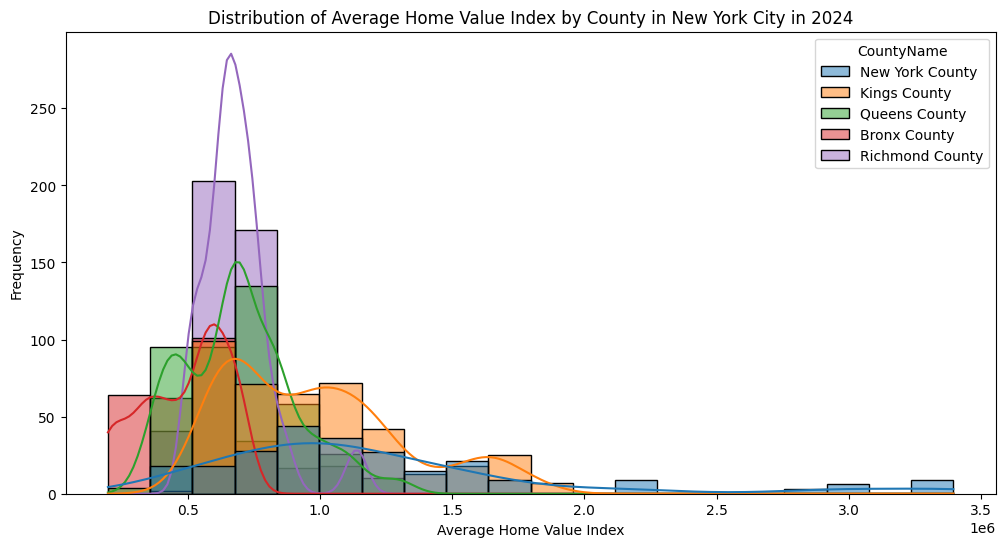

In [13]:
# Plot the histogram of the average HVI for each County in 2024
plt.figure(figsize=(12,6))
sns.histplot(data = nyc_neighbor_HVI_long[nyc_neighbor_HVI_long['Year']==2024], x = 'HVI', hue = 'CountyName', bins = 20, kde = True)
plt.title('Distribution of Average Home Value Index by County in New York City in 2024')
plt.xlabel('Average Home Value Index')
plt.ylabel('Frequency')
plt.show()

The distributions of house value index in each county are pretty different. The house value index of New York County is highly right-skewed with outliers above \$3,000,000. The house value index of Bronx County is a bit left-skewed. Based on the peaks of the distributions, value of most of the houses in NYC are between \$50,000 and $1,000,000.

In [14]:
# write the data to a csv file
nyc_county_HVI_avg.to_csv('./data/nyc_county_HVI_avg.csv.gz', index = False, compression='gzip')

### Eviction Data

In [16]:
# Load the data
nyc_evictions = pd.read_csv('data/Evictions_20241017.csv.gz', compression='gzip')
nyc_evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,54296/20,11304,279 WEST 22ND STREET,5,11/21/2023,David,Smith,Residential,MANHATTAN,10011,Not an Ejectment,Possession,40.744426,-73.998466,4.0,3.0,91.0,1014101.0,1.007720e+09,Hudson Yards-Chelsea-Flatiron-Union Square
1,74742/16,5193,134-10 101 AVE APT 1,1,06/08/2017,Robert,Renzulli,Residential,QUEENS,11419,Not an Ejectment,Possession,40.693497,-73.813489,9.0,28.0,152.0,4450612.0,4.095020e+09,Richmond Hill
2,50891/19,496507,2110 ARTHUR AVENUE,2,02/13/2020,Danny,Weinheim,Residential,BRONX,10457,Not an Ejectment,Possession,40.849868,-73.891292,6.0,15.0,373.0,2012027.0,2.030700e+09,East Tremont
3,340945/23,37543,1823 NARRAGANSETT AVENUE,NaN,07/23/2024,Edward,Guida,Residential,BRONX,10461,Not an Ejectment,Possession,40.852777,-73.848857,11.0,13.0,288.0,2046825.0,2.042030e+09,Pelham Parkway
4,59295/17,12167,62-60 60TH ROAD,NaN,09/12/2017,Edward,Guida,Residential,QUEENS,11378,Not an Ejectment,Possession,40.716371,-73.901098,5.0,30.0,601.0,4433508.0,4.027580e+09,Maspeth


In [17]:
# look at residential vs. commercial evictions
nyc_evictions['Residential/Commercial'].value_counts()

Residential/Commercial
Residential    89286
Commercial      9073
Name: count, dtype: int64

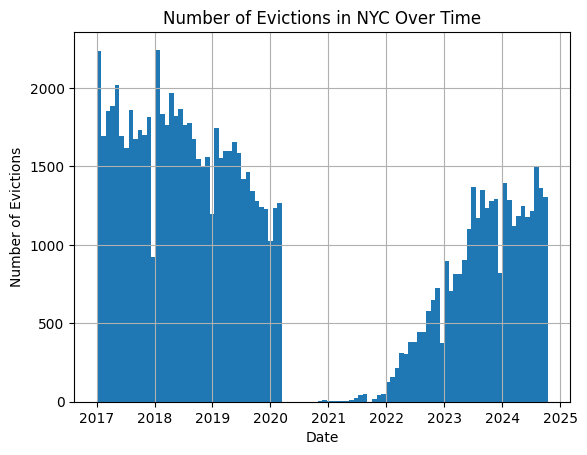

In [18]:
# time period covered
# convert to datetime
nyc_evictions['Executed Date'] = pd.to_datetime(nyc_evictions['Executed Date'])

# plot the number of evictions over time
nyc_evictions['Executed Date'].hist(bins=100)
plt.xlabel('Date')
plt.ylabel('Number of Evictions')
plt.title('Number of Evictions in NYC Over Time')
plt.show()

In [19]:
# spatial
nyc_evictions['BOROUGH'].value_counts()

BOROUGH
BRONX            31161
BROOKLYN         28284
QUEENS           19075
MANHATTAN        16214
STATEN ISLAND     3625
Name: count, dtype: int64

In [20]:
## plot count of total evictions by borough over time
nyc_evictions['YEAR'] = nyc_evictions['Executed Date'].dt.year
by_borough = nyc_evictions.groupby(['YEAR', 'BOROUGH']).size().unstack().reset_index()
print(by_borough.head())

# ## reshape to long by borough
by_borough_long = by_borough.melt(id_vars='YEAR', var_name='BOROUGH', value_name='EVICTION_COUNT')
print(by_borough_long.head())

BOROUGH  YEAR  BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
0        2017   7658      6355       3450    4325            734
1        2018   7140      6157       3390    4452            691
2        2019   6244      5312       2818    3705            636
3        2020   1088      1005        521     696            112
4        2021     29       100         68      36             35
   YEAR BOROUGH  EVICTION_COUNT
0  2017   BRONX            7658
1  2018   BRONX            7140
2  2019   BRONX            6244
3  2020   BRONX            1088
4  2021   BRONX              29


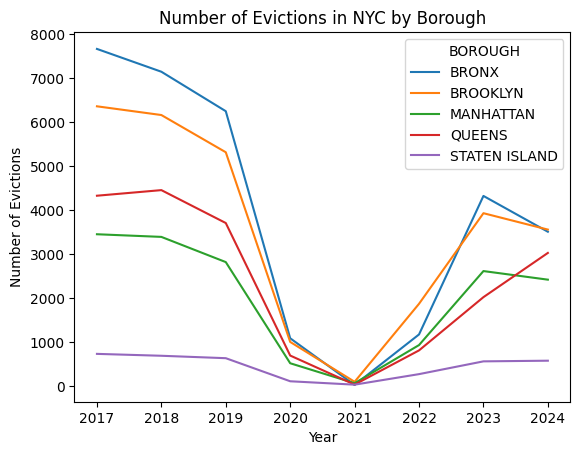

In [21]:
# plot total evictions on the y-axis and year on the x-axis
fig, ax = plt.subplots()
sns.lineplot(data=by_borough_long, x='YEAR', y='EVICTION_COUNT', hue='BOROUGH')
plt.xlabel('Year')
plt.ylabel('Number of Evictions')
plt.title('Number of Evictions in NYC by Borough')
plt.show()


In [22]:
# write out the data
by_borough.to_csv('data/nyc_borough_evictions_aggregate.csv.gz', index=False, compression='gzip')

### Borough-level School Attendance Data for NYC Public Schools

Dataset: NYC Public Borough Attendance Results for 2018 - 2023
URL: https://infohub.nyced.org/reports/students-and-schools/school-quality/information-and-data-overview/end-of-year-attendance-and-chronic-absenteeism-data

- Read in attendance data from NYC Department of Education Excel file
- Do some simple data cleaning and manipulation
- Visualize absentee rates by borough, year, grade level, and among students identified as impoverished or not.

In [23]:
# Load data from excel file
eduData = pd.read_excel("../project/data/public-borough-attendance-results-2018-2023.xlsx", sheet_name="Poverty")
eduData

,Borough,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,Bronx,All Grades,Not Poverty,2018-19,4486011,325072,4160939,92.753654,27214,5679,20.867935
1,Bronx,All Grades,Poverty,2018-19,29195861,3124510,26071351,89.298103,174947,65284,37.316444
2,Bronx,All Grades,Not Poverty,2019-20,2669112,174680,2494432,93.455498,24413,4537,18.584360
3,Bronx,All Grades,Poverty,2019-20,18589103,1871363,16717740,89.933014,169471,57454,33.901966
4,Bronx,All Grades,Not Poverty,2020-21,3850658,260937,3589721,93.223572,23071,4500,19.505007
...,...,...,...,...,...,...,...,...,...,...,...
745,Staten Island,12,Poverty,2020-21,453229,91438,361791,79.825211,2651,1248,47.076576
746,Staten Island,12,Not Poverty,2021-22,298267,37956,260311,87.274490,1779,779,43.788647
747,Staten Island,12,Poverty,2021-22,433600,76204,357396,82.425278,2616,1375,52.561161
748,Staten Island,12,Not Poverty,2022-23,277592,25666,251926,90.754059,1699,533,31.371395


The variables of interest in this dataset are the attendance rate, "% Attendance" and the chronic absenteeism rate, "% Chronic Absenteeism", and the poverty category (Poverty or not Poverty, variable name above is "Category"). The attendance rate represents the percentage of days that students attended school out of the total number of days in the school year, with each student in the dataset contributing a day, and these total numbers being summed across all students. The chronic absenteeism rate represents the percentage of students who missed 10% or more of the school year and were enrolled for at least 10 days and present for class for at least one day.

The size of the dataset is relatively small at 750 rows by 11 columns and covers the 2018-19 academic year through the 2022-23 academic year.

In [24]:
# Add a county column based on borough (coextensive)
boroughMap = {
    "Bronx": "Bronx",
    "Brooklyn": "Kings",
    "Manhattan": "New York",
    "Queens": "Queens",
    "Staten Island": "Richmond"
}

eduData.insert(1, "County", eduData["Borough"].map(boroughMap))

# Rename poverty category column
eduData.rename(columns={"Category" : "Poverty Category"}, inplace=True)
eduData

,Borough,County,Grade,Poverty Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,Bronx,Bronx,All Grades,Not Poverty,2018-19,4486011,325072,4160939,92.753654,27214,5679,20.867935
1,Bronx,Bronx,All Grades,Poverty,2018-19,29195861,3124510,26071351,89.298103,174947,65284,37.316444
2,Bronx,Bronx,All Grades,Not Poverty,2019-20,2669112,174680,2494432,93.455498,24413,4537,18.584360
3,Bronx,Bronx,All Grades,Poverty,2019-20,18589103,1871363,16717740,89.933014,169471,57454,33.901966
4,Bronx,Bronx,All Grades,Not Poverty,2020-21,3850658,260937,3589721,93.223572,23071,4500,19.505007
...,...,...,...,...,...,...,...,...,...,...,...,...
745,Staten Island,Richmond,12,Poverty,2020-21,453229,91438,361791,79.825211,2651,1248,47.076576
746,Staten Island,Richmond,12,Not Poverty,2021-22,298267,37956,260311,87.274490,1779,779,43.788647
747,Staten Island,Richmond,12,Poverty,2021-22,433600,76204,357396,82.425278,2616,1375,52.561161
748,Staten Island,Richmond,12,Not Poverty,2022-23,277592,25666,251926,90.754059,1699,533,31.371395


Here we rename "Category" to "Poverty Category" so as to be more descriptive. We also add a column identifying the counties of the data for cross-comparison with other datasets.

In [25]:
# Write modified data to csv file
eduData.to_csv("nyc_attendance_cleaned.csv", index=False)

# Isolate provided all-grades aggregate data
allGrades = eduData[eduData["Grade"] == "All Grades"]

Here we isolate the in-set aggregated data across all grades for use in visualizing some of the aggregated data.

<Axes: title={'center': 'Mean Chronic Absenteeism by Borough and Year'}, xlabel='Academic Year', ylabel='% Chronically Absent'>

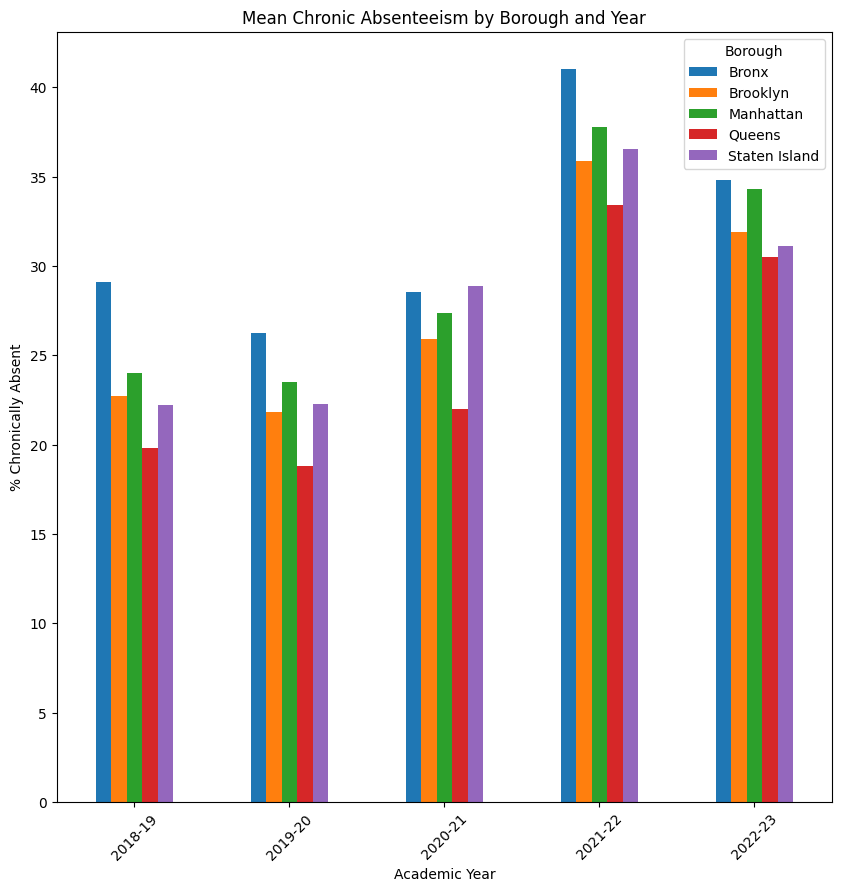

In [26]:
# Plot chronic absenteeism by borough and year
allGrades.groupby(["Year", "Borough"])["% Chronically Absent"].mean().unstack().plot(kind="bar", figsize=(10, 10),
                                                                                     title="Mean Chronic Absenteeism by Borough and Year",
                                                                                     xlabel="Academic Year", ylabel="% Chronically Absent",
                                                                                     rot=45)

<Axes: title={'center': 'Mean Chronic Absenteeism by Grade and Poverty'}, xlabel='Grade', ylabel='% Chronically Absent'>

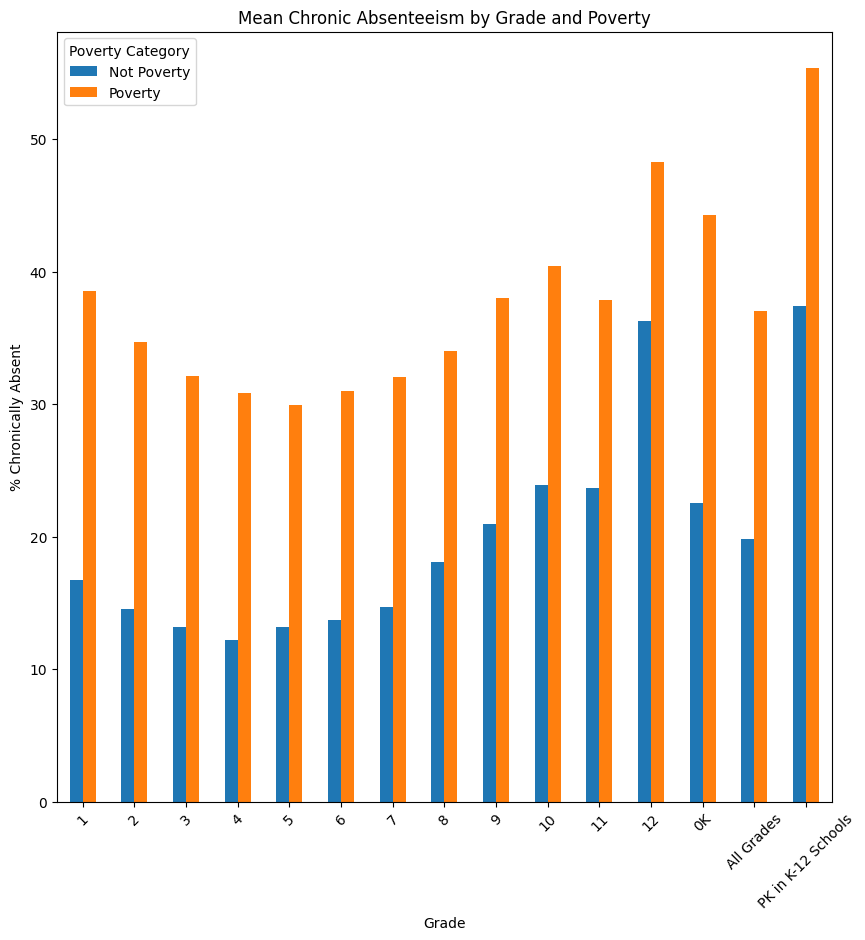

In [27]:
# Chronic absenteeism by grade and poverty
eduData.groupby(["Grade", "Poverty Category"])["% Chronically Absent"].mean().unstack().plot(kind="bar", figsize=(10, 10),
                                                                                            title="Mean Chronic Absenteeism by Grade and Poverty",
                                                                                            xlabel="Grade", ylabel="% Chronically Absent",
                                                                                            rot=45)

## Data Manipulation

In [28]:
eviction_borough = pd.read_csv('./data/nyc_borough_evictions_aggregate.csv.gz', compression='gzip')

In [29]:
eviction_borough.describe()

,YEAR,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2020.50000,3895.125000,3535.500000,2026.750000,2384.375000,453.125000
std,2.44949,2946.251102,2363.681209,1325.948582,1738.753325,272.642328
min,2017.00000,29.000000,100.000000,68.000000,36.000000,35.000000
25%,2018.75000,1153.250000,1654.500000,830.750000,783.750000,233.500000
50%,2020.50000,3913.500000,3742.000000,2516.500000,2524.000000,571.500000
75%,2022.25000,6468.000000,5523.250000,2961.000000,3860.000000,649.750000
max,2024.00000,7658.000000,6355.000000,3450.000000,4452.000000,734.000000


In [30]:
# reshape the data from wide to long
eviction_borough_long = pd.melt(eviction_borough, id_vars=['YEAR'], var_name='Borough', value_name='Evictions')
eviction_borough_long.describe()

,YEAR,Evictions
count,40.000000,40.000000
mean,2020.500000,2458.975000
std,2.320477,2226.644325
min,2017.000000,29.000000
25%,2018.750000,621.750000
50%,2020.500000,1946.500000
75%,2022.250000,3760.750000
max,2024.000000,7658.000000


In [31]:
# Map the borough names to the county names
borough_county_map = {'BRONX':'Bronx', 'BROOKLYN':'Kings', 'MANHATTAN':'New York', 'QUEENS':'Queens', 'STATEN ISLAND':'Richmond'}

# Create a new column for County name and according to the map
eviction_borough_long['County'] = eviction_borough_long['Borough'].map(borough_county_map)

In [32]:
# Manipulate the County Name in house value index data to match the eviction data
nyc_county_HVI_avg.loc[:,'County'] = nyc_county_HVI_avg['CountyName'].str.replace(' County','')
nyc_county_HVI_avg.drop(columns = 'CountyName', inplace = True)

In [33]:
# Merge the two dataframes
nyc_eviction_HVI = pd.merge(eviction_borough_long, nyc_county_HVI_avg, left_on = ['YEAR','County'], right_on = ['Year','County'], how = 'inner')

# Inspect the dataframe
nyc_eviction_HVI.sample(5)

,YEAR,Borough,Evictions,County,Year,HVI
9,2018,BROOKLYN,6157,Kings,2018,9.453459e+05
17,2018,MANHATTAN,3390,New York,2018,1.503418e+06
2,2019,BRONX,6244,Bronx,2019,4.528717e+05
14,2023,BROOKLYN,3928,Kings,2023,9.857939e+05
21,2022,MANHATTAN,934,New York,2022,1.424203e+06


In [34]:
nyc_eviction_HVI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       40 non-null     int64  
 1   Borough    40 non-null     object 
 2   Evictions  40 non-null     int64  
 3   County     40 non-null     object 
 4   Year       40 non-null     int32  
 5   HVI        40 non-null     float64
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 1.8+ KB


In [35]:
nyc_eviction_HVI.describe()

,YEAR,Evictions,Year,HVI
count,40.000000,40.000000,40.000000,4.000000e+01
mean,2020.500000,2458.975000,2020.500000,8.244844e+05
std,2.320477,2226.644325,2.320477,3.360126e+05
min,2017.000000,29.000000,2017.000000,4.160381e+05
25%,2018.750000,621.750000,2018.750000,5.907895e+05
50%,2020.500000,1946.500000,2020.500000,6.896758e+05
75%,2022.250000,3760.750000,2022.250000,9.844725e+05
max,2024.000000,7658.000000,2024.000000,1.505919e+06


## Data Visualization

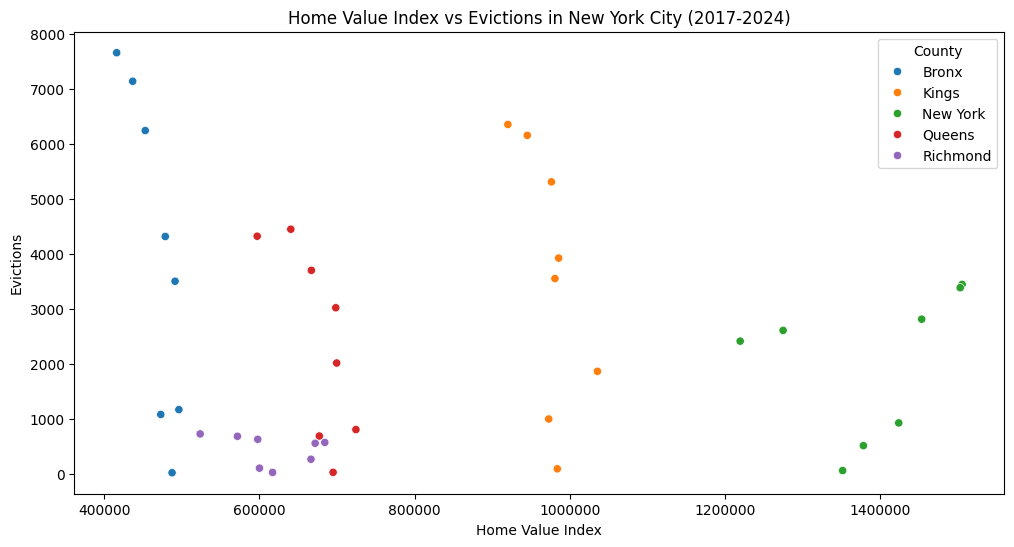

In [36]:
# Create a scatterplot for HVI and evictions
plt.figure(figsize=(12,6))
sns.scatterplot(data = nyc_eviction_HVI, x = 'HVI', y = 'Evictions', hue = 'County')
plt.title('Home Value Index vs Evictions in New York City (2017-2024)')
plt.xlabel('Home Value Index')
plt.ylabel('Evictions')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

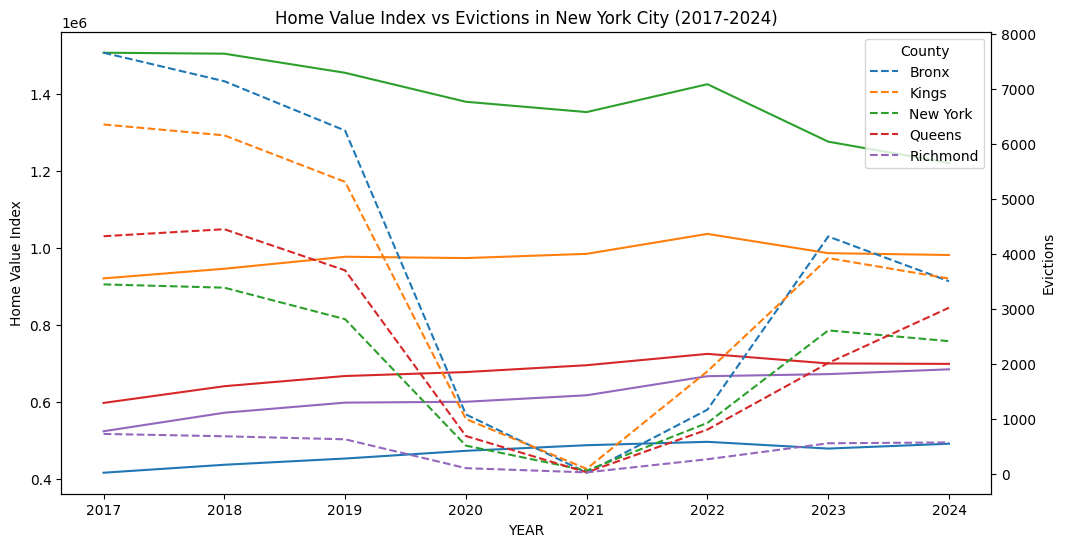

In [37]:
# Create a line plot for HVI and evictions
# use a different y axis for Evictions

fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = nyc_eviction_HVI, x = 'YEAR', y = 'HVI', hue = 'County', ax = ax1)  
ax1.set_ylabel('Home Value Index')
ax2 = ax1.twinx()
sns.lineplot(data = nyc_eviction_HVI, x = 'YEAR', y = 'Evictions', hue = 'County', ax = ax2, palette = 'tab10', linestyle = '--')
ax2.set_ylabel('Evictions')
ax1.get_legend().remove()
plt.title('Home Value Index vs Evictions in New York City (2017-2024)')
plt.xlabel('Year')
plt.show()
